# import libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import string
import requests

# Loading Data

In [2]:
url = "https://www.gutenberg.org/ebooks/4255.txt.utf-8"
response = requests.get(url)
data = response.text
print(f"Dataset length: {len(data)} characters")
print(data[:500])

Dataset length: 55703 characters
﻿The Project Gutenberg eBook of A Yorkshire Tragedy
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this


# Data Preprocessing

In [3]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    return text

cleaned_text = preprocess_text(data)
print(cleaned_text[:500])

﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever you may copy it give it away or reuse it under the terms
of the project gutenberg license included with this ebook or online
at wwwgutenbergorg if you are not located in the united states
you will have to check the laws of the country where you are located
before using this ebook


In [4]:
# Tokenize the text (character-level)
chars = sorted(list(set(cleaned_text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}

vocab_size = len(chars)
print("Total Characters:", len(cleaned_text))
print("Unique Characters:", vocab_size)
print("Character to integer mapping", char_to_int)

Total Characters: 53543
Unique Characters: 47
Character to integer mapping {'\n': 0, '\r': 1, ' ': 2, '0': 3, '1': 4, '2': 5, '3': 6, '4': 7, '5': 8, '6': 9, '7': 10, '8': 11, '9': 12, 'a': 13, 'b': 14, 'c': 15, 'd': 16, 'e': 17, 'f': 18, 'g': 19, 'h': 20, 'i': 21, 'j': 22, 'k': 23, 'l': 24, 'm': 25, 'n': 26, 'o': 27, 'p': 28, 'q': 29, 'r': 30, 's': 31, 't': 32, 'u': 33, 'v': 34, 'w': 35, 'x': 36, 'y': 37, 'z': 38, '—': 39, '‘': 40, '’': 41, '“': 42, '”': 43, '•': 44, '™': 45, '\ufeff': 46}


In [5]:
# Prepare sequences of characters as input and next character as output
seq_length = 100 # Length of input sequences
step = 3 # Step to move while creating sequences

sequences = []
next_chars = []

for i in range(0, len(cleaned_text) - seq_length, step):
    sequences.append(cleaned_text[i:i + seq_length])
    next_chars.append(cleaned_text[i + seq_length])
    
    print(f"Number Of sequences: {len(sequences)}")
    print("Example sequence:", sequences[0])
    print("Next character:", next_chars[0])

Number Of sequences: 1
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 2
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7
Example sequence: ﻿the projec

Next character: e
Number Of sequences: 969
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 970
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 971
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 972
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 973
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 974
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9

Next character: e
Number Of sequences: 2468
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 2469
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 2470
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 2471
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 2472
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 2473
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3078
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3079
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3080
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3081
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3082
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3083
Example sequence: ﻿the project gut

Number Of sequences: 3239
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3240
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3241
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3242
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3243
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3244
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3245
Example 

Number Of sequences: 3342
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3343
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3344
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3345
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3346
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3347
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3348
Example 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3441
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3442
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3443
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3444
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3445
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3446
Example sequence: ﻿the project gut

Number Of sequences: 3516
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3517
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3518
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3519
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3520
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3521
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3522
Example 

Next character: e
Number Of sequences: 3574
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3575
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3576
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3577
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3578
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3579
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 3648
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3649
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3650
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3651
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3652
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3653
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 3721
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3722
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3723
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3724
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3725
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3726
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3727
Example 

Number Of sequences: 3805
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3806
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3807
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3808
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3809
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3810
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3811
Example 

Number Of sequences: 3874
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3875
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3876
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3877
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3878
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3879
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3880
Example 

Number Of sequences: 3946
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3947
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3948
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3949
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3950
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3951
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3952
Example 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3998
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 3999
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4000
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4001
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4002
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4003
Example sequence: ﻿the project gut

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4057
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4058
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4059
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4060
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4061
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4062
Example sequence: ﻿the project gut

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4120
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4121
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4122
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4123
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4124
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4125
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyon

Number Of sequences: 4218
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4219
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4220
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4221
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4222
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4223
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4224
Example 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4301
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4302
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4303
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4304
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4305
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4306
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 4362
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4363
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4364
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4365
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4366
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4367
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4435
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4436
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4437
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4438
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4439
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4440
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 4499
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4500
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4501
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4502
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4503
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4504
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 4576
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4577
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4578
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4579
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4580
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4581
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 4673
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4674
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4675
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4676
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4677
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4678
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 4755
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4756
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4757
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4758
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4759
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4760
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4761
Example 

Next character: e
Number Of sequences: 4818
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4819
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4820
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4821
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4822
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4823
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4872
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4873
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4874
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4875
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4876
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4877
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyon

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4928
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4929
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4930
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4931
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4932
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 4933
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 5027
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5028
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5029
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5030
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5031
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5032
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 5078
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5079
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5080
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5081
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5082
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5083
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5084
Example 

Next character: e
Number Of sequences: 5147
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5148
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5149
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5150
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5151
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5152
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5223
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5224
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5225
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5226
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5227
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5228
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyon

Number Of sequences: 5309
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5310
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5311
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5312
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5313
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5314
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5315
Example 

Next character: e
Number Of sequences: 5380
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5381
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5382
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5383
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5384
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5385
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5460
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5461
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5462
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5463
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5464
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5465
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyon

Next character: e
Number Of sequences: 5530
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5531
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5532
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5533
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5534
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5535
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 5597
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5598
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5599
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5600
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5601
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5602
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5603
Example 

Next character: e
Number Of sequences: 5651
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5652
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5653
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5654
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5655
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5656
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 5718
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5719
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5720
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5721
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5722
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5723
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5724
Example 

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5780
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5781
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5782
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5783
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5784
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5785
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyon

Next character: e
Number Of sequences: 5854
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5855
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5856
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5857
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5858
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5859
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5921
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5922
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5923
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5924
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5925
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5926
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 5981
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5982
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5983
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5984
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5985
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 5986
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 6047
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6048
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6049
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6050
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6051
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6052
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6053
Example 

Number Of sequences: 6107
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6108
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6109
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6110
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6111
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6112
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6113
Example 

Next character: e
Number Of sequences: 6177
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6178
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6179
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6180
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6181
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6182
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 6239
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6240
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6241
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6242
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6243
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6244
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 6292
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6293
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6294
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6295
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6296
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6297
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 6347
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6348
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6349
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6350
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6351
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6352
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 6409
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6410
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6411
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6412
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6413
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6414
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 6503
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6504
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6505
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6506
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6507
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6508
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 6565
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6566
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6567
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6568
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6569
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6570
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6571
Example 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6619
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6620
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6621
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6622
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6623
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6624
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 6694
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6695
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6696
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6697
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6698
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6699
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6753
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6754
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6755
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6756
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6757
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6758
Example sequence: ﻿the project gut

Number Of sequences: 6842
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6843
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6844
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6845
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6846
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6847
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6848
Example 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6899
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6900
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6901
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6902
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6903
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6904
Example sequence: ﻿the project gut

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6977
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6978
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6979
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6980
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6981
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 6982
Example sequence: ﻿the project gut

Number Of sequences: 7043
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7044
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7045
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7046
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7047
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7048
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7049
Example 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7101
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7102
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7103
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7104
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7105
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7106
Example sequence: ﻿the project gut

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7152
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7153
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7154
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7155
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7156
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7157
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 7219
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7220
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7221
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7222
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7223
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7224
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7291
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7292
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7293
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7294
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7295
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7296
Example sequence: ﻿the project gut

Number Of sequences: 7376
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7377
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7378
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7379
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7380
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7381
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7382
Example 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7452
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7453
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7454
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7455
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7456
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7457
Example sequence: ﻿the project gut

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7514
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7515
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7516
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7517
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7518
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7519
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 7571
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7572
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7573
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7574
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7575
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7576
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7627
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7628
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7629
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7630
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7631
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7632
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyon

Next character: e
Number Of sequences: 7696
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7697
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7698
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7699
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7700
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7701
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7748
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7749
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7750
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7751
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7752
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7753
Example sequence: ﻿the project gut

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7800
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7801
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7802
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7803
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7804
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7805
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyon

Next character: e
Number Of sequences: 7861
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7862
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7863
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7864
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7865
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7866
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7918
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7919
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7920
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7921
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7922
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7923
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyon

Next character: e
Number Of sequences: 7982
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7983
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7984
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7985
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7986
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 7987
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 8048
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8049
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8050
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8051
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8052
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8053
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 8103
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8104
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8105
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8106
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8107
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8108
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8109
Example 

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8176
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8177
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8178
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8179
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8180
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8181
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyon

Next character: e
Number Of sequences: 8242
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8243
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8244
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8245
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8246
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8247
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8305
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8306
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8307
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8308
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8309
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8310
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 8361
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8362
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8363
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8364
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8365
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8366
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 8414
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8415
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8416
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8417
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8418
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8419
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 8479
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8480
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8481
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8482
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8483
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8484
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8485
Example 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8538
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8539
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8540
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8541
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8542
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8543
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 8603
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8604
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8605
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8606
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8607
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8608
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8656
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8657
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8658
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8659
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8660
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8661
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 8724
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8725
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8726
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8727
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8728
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8729
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8784
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8785
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8786
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8787
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8788
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8789
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 8845
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8846
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8847
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8848
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8849
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8850
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8897
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8898
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8899
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8900
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8901
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8902
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyon

Number Of sequences: 8956
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8957
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8958
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8959
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8960
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8961
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 8962
Example 

Number Of sequences: 9012
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9013
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9014
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9015
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9016
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9017
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9018
Example 

Next character: e
Number Of sequences: 9083
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9084
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9085
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9086
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9087
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9088
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9154
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9155
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9156
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9157
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9158
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9159
Example sequence: ﻿the project gut

Number Of sequences: 9216
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9217
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9218
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9219
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9220
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9221
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9222
Example 

Number Of sequences: 9279
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9280
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9281
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9282
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9283
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9284
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9285
Example 

Number Of sequences: 9354
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9355
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9356
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9357
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9358
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9359
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9360
Example 

Next character: e
Number Of sequences: 9406
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9407
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9408
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9409
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9410
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9411
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 9461
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9462
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9463
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9464
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9465
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9466
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 9519
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9520
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9521
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9522
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9523
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9524
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9574
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9575
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9576
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9577
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9578
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9579
Example sequence: ﻿the project gut

Next character: e
Number Of sequences: 9632
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9633
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9634
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9635
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9636
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9637
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 9690
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9691
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9692
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9693
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9694
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9695
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9696
Example 

Next character: e
Number Of sequences: 9758
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9759
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9760
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9761
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9762
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9763
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 9830
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9831
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9832
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9833
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9834
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9835
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 9886
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9887
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9888
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9889
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9890
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9891
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Next character: e
Number Of sequences: 9938
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9939
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9940
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9941
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9942
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 9943
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequen

Number Of sequences: 10007
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10008
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10009
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10010
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10011
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10012
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10013
E

Next character: e
Number Of sequences: 10073
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10074
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10075
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10076
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10077
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10078
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Number Of sequences: 10136
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10137
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10138
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10139
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10140
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10141
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10142
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10212
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10213
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10214
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10215
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10216
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10217
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10264
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10265
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10266
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10267
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10268
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10269
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 10318
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10319
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10320
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10321
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10322
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10323
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 10374
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10375
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10376
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10377
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10378
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10379
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10451
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10452
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10453
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10454
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10455
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10456
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10510
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10511
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10512
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10513
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10514
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10515
Example sequence: ﻿the proje

Number Of sequences: 10575
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10576
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10577
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10578
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10579
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10580
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10581
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10638
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10639
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10640
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10641
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10642
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10643
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10696
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10697
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10698
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10699
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10700
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10701
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 10759
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10760
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10761
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10762
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10763
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10764
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Number Of sequences: 10812
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10813
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10814
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10815
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10816
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10817
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10818
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10869
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10870
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10871
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10872
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10873
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10874
Example sequence: ﻿the proje

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10932
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10933
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10934
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10935
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10936
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10937
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Number Of sequences: 10983
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10984
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10985
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10986
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10987
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10988
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 10989
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11039
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11040
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11041
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11042
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11043
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11044
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 11094
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11095
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11096
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11097
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11098
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11099
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11155
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11156
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11157
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11158
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11159
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11160
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 11207
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11208
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11209
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11210
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11211
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11212
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11260
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11261
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11262
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11263
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11264
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11265
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 11315
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11316
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11317
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11318
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11319
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11320
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 11378
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11379
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11380
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11381
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11382
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11383
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11431
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11432
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11433
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11434
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11435
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11436
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Next character: e
Number Of sequences: 11486
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11487
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11488
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11489
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11490
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11491
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11543
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11544
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11545
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11546
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11547
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11548
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11602
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11603
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11604
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11605
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11606
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11607
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 11660
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11661
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11662
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11663
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11664
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11665
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 11722
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11723
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11724
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11725
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11726
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11727
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 11793
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11794
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11795
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11796
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11797
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11798
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 11852
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11853
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11854
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11855
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11856
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11857
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 11904
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11905
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11906
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11907
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11908
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11909
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 11981
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11982
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11983
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11984
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11985
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 11986
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12049
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12050
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12051
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12052
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12053
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12054
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 12113
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12114
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12115
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12116
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12117
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12118
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 12173
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12174
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12175
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12176
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12177
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12178
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 12224
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12225
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12226
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12227
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12228
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12229
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12281
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12282
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12283
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12284
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12285
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12286
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Next character: e
Number Of sequences: 12338
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12339
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12340
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12341
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12342
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12343
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12408
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12409
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12410
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12411
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12412
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12413
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12463
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12464
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12465
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12466
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12467
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12468
Example sequence: ﻿the proje

Number Of sequences: 12513
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12514
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12515
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12516
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12517
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12518
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12519
E

Number Of sequences: 12568
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12569
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12570
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12571
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12572
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12573
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12574
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12633
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12634
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12635
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12636
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12637
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12638
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12708
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12709
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12710
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12711
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12712
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12713
Example sequence: ﻿the proje

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12758
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12759
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12760
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12761
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12762
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12763
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12810
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12811
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12812
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12813
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12814
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12815
Example sequence: ﻿the proje

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12870
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12871
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12872
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12873
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12874
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12875
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Next character: e
Number Of sequences: 12931
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12932
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12933
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12934
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12935
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12936
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 12993
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12994
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12995
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12996
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12997
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 12998
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13048
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13049
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13050
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13051
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13052
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13053
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13104
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13105
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13106
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13107
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13108
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13109
Example sequence: ﻿the proje

Number Of sequences: 13166
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13167
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13168
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13169
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13170
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13171
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13172
E

Next character: e
Number Of sequences: 13217
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13218
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13219
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13220
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13221
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13222
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 13269
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13270
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13271
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13272
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13273
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13274
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 13326
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13327
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13328
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13329
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13330
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13331
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13383
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13384
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13385
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13386
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13387
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13388
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13441
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13442
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13443
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13444
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13445
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13446
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13495
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13496
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13497
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13498
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13499
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13500
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 13559
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13560
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13561
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13562
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13563
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13564
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 13619
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13620
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13621
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13622
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13623
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13624
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 13686
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13687
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13688
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13689
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13690
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13691
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 13738
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13739
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13740
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13741
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13742
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13743
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 13791
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13792
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13793
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13794
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13795
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13796
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13846
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13847
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13848
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13849
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13850
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13851
Example sequence: ﻿the proje

Number Of sequences: 13912
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13913
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13914
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13915
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13916
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13917
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13918
E

Next character: e
Number Of sequences: 13963
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13964
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13965
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13966
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13967
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 13968
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14029
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14030
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14031
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14032
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14033
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14034
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14085
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14086
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14087
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14088
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14089
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14090
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14158
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14159
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14160
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14161
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14162
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14163
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14211
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14212
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14213
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14214
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14215
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14216
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 14265
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14266
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14267
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14268
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14269
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14270
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 14324
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14325
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14326
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14327
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14328
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14329
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14385
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14386
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14387
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14388
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14389
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14390
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Next character: e
Number Of sequences: 14438
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14439
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14440
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14441
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14442
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14443
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 14493
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14494
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14495
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14496
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14497
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14498
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 14544
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14545
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14546
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14547
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14548
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14549
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 14599
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14600
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14601
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14602
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14603
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14604
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14662
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14663
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14664
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14665
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14666
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14667
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 14720
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14721
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14722
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14723
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14724
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14725
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14772
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14773
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14774
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14775
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14776
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14777
Example sequence: ﻿the proje

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14835
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14836
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14837
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14838
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14839
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14840
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14895
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14896
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14897
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14898
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14899
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14900
Example sequence: ﻿the proje

Number Of sequences: 14952
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14953
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14954
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14955
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14956
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14957
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 14958
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15018
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15019
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15020
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15021
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15022
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15023
Example sequence: ﻿the proje

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15070
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15071
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15072
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15073
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15074
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15075
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Number Of sequences: 15123
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15124
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15125
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15126
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15127
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15128
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15129
E

Next character: e
Number Of sequences: 15176
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15177
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15178
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15179
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15180
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15181
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15232
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15233
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15234
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15235
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15236
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15237
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15287
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15288
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15289
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15290
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15291
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15292
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 15339
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15340
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15341
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15342
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15343
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15344
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Number Of sequences: 15393
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15394
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15395
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15396
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15397
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15398
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15399
E

Next character: e
Number Of sequences: 15452
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15453
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15454
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15455
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15456
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15457
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 15525
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15526
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15527
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15528
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15529
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15530
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 15579
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15580
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15581
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15582
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15583
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15584
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15645
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15646
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15647
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15648
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15649
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15650
Example sequence: ﻿the proje

Number Of sequences: 15703
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15704
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15705
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15706
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15707
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15708
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15709
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15765
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15766
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15767
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15768
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15769
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15770
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 15824
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15825
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15826
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15827
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15828
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15829
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15877
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15878
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15879
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15880
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15881
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15882
Example sequence: ﻿the proje

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15928
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15929
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15930
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15931
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15932
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15933
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15991
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15992
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15993
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15994
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15995
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 15996
Example sequence: ﻿the proje

Number Of sequences: 16053
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16054
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16055
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16056
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16057
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16058
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16059
E

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16113
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16114
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16115
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16116
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16117
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16118
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Number Of sequences: 16177
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16178
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16179
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16180
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16181
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16182
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16183
E

Next character: e
Number Of sequences: 16231
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16232
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16233
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16234
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16235
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16236
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16285
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16286
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16287
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16288
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16289
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16290
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16338
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16339
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16340
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16341
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16342
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16343
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of

Number Of sequences: 16393
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16394
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16395
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16396
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16397
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16398
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16399
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16448
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16449
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16450
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16451
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16452
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16453
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16503
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16504
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16505
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16506
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16507
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16508
Example sequence: ﻿the proje

Number Of sequences: 16565
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16566
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16567
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16568
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16569
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16570
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16571
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16623
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16624
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16625
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16626
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16627
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16628
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 16677
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16678
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16679
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16680
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16681
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16682
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 16734
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16735
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16736
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16737
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16738
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16739
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Number Of sequences: 16789
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16790
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16791
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16792
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16793
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16794
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16795
E

Number Of sequences: 16845
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16846
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16847
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16848
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16849
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16850
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16851
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16912
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16913
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16914
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16915
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16916
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16917
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 16968
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16969
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16970
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16971
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16972
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 16973
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17028
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17029
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17030
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17031
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17032
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17033
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17079
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17080
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17081
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17082
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17083
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17084
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 17130
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17131
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17132
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17133
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17134
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17135
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Number Of sequences: 17189
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17190
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17191
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17192
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17193
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17194
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17195
E

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17247
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17248
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17249
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17250
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17251
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17252
Example sequence: ﻿the proje

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17307
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17308
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17309
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17310
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17311
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17312
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 17357
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17358
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17359
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17360
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17361
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17362
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 17412
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17413
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17414
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17415
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17416
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17417
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 17463
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17464
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17465
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17466
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17467
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17468
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17522
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17523
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17524
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17525
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17526
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17527
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 17578
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17579
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17580
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17581
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17582
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17583
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 17629
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17630
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17631
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17632
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17633
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17634
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Next character: e
Number Of sequences: 17683
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17684
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17685
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17686
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17687
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17688
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17742
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17743
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17744
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17745
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17746
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17747
Example sequence: ﻿the proje

Next character: e
Number Of sequences: 17800
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17801
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17802
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17803
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17804
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of sequences: 17805
Example sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh
Next character: e
Number Of 

In [6]:
# Convert sequences to numerical representation
X = np.zeros((len(sequences), seq_length, vocab_size), dtype=np.bool_)
y = np.zeros((len(sequences), vocab_size), dtype=np.bool_)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        X[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (17815, 100, 47)
y shape: (17815, 47)


# Model Design

In [7]:
model = Sequential([
    LSTM(256, input_shape=(seq_length, vocab_size), return_sequences=True),
    LSTM(256),
    Dense(vocab_size, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

C:\Users\Ayush\OneDrive\Desktop\TF Project\tfvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 256)       │       311,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 47)             │        12,079 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 848,687 (3.24 MB)

 Trainable params: 848,687 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint("text_gen_model.h5", monitor='loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(X, y, batch_size=128, epochs=20, callbacks=[checkpoint, early_stopping])

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - loss: 3.1976

140/140 ━━━━━━━━━━━━━━━━━━━━ 96s 641ms/step - loss: 3.1968
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - loss: 2.9378

140/140 ━━━━━━━━━━━━━━━━━━━━ 150s 703ms/step - loss: 2.9370
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 708ms/step - loss: 2.5291

140/140 ━━━━━━━━━━━━━━━━━━━━ 100s 710ms/step - loss: 2.5287
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - loss: 2.3389

140/140 ━━━━━━━━━━━━━━━━━━━━ 104s 742ms/step - loss: 2.3386
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 2.1525

140/140 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - loss: 2.1524
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - loss: 2.0378

140/140 ━━━━━━━━━━━━━━━━━━━━ 137s 732ms/step - loss: 2.0377
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - loss: 1.9283

140/140 ━━━━━━━━━━━━━━━━━━━━ 101s 724ms/step - loss: 1.9283
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - loss: 1.8386

140/140 ━━━━━━━━━━━━━━━━━━━━ 142s 722ms/step - loss: 1.8386
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - loss: 1.7564

140/140 ━━━━━━━━━━━━━━━━━━━━ 101s 718ms/step - loss: 1.7564
Epoch 10/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - loss: 1.6663

140/140 ━━━━━━━━━━━━━━━━━━━━ 153s 799ms/step - loss: 1.6663
Epoch 11/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - loss: 1.5540

140/140 ━━━━━━━━━━━━━━━━━━━━ 112s 795ms/step - loss: 1.5542
Epoch 12/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - loss: 1.4665

140/140 ━━━━━━━━━━━━━━━━━━━━ 102s 728ms/step - loss: 1.4666
Epoch 13/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 776ms/step - loss: 1.3496

140/140 ━━━━━━━━━━━━━━━━━━━━ 149s 778ms/step - loss: 1.3498
Epoch 14/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - loss: 1.2597

140/140 ━━━━━━━━━━━━━━━━━━━━ 142s 777ms/step - loss: 1.2598
Epoch 15/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - loss: 1.1324

140/140 ━━━━━━━━━━━━━━━━━━━━ 109s 775ms/step - loss: 1.1325
Epoch 16/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - loss: 1.0066

140/140 ━━━━━━━━━━━━━━━━━━━━ 144s 789ms/step - loss: 1.0067
Epoch 17/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 708ms/step - loss: 0.8632

140/140 ━━━━━━━━━━━━━━━━━━━━ 131s 711ms/step - loss: 0.8634
Epoch 18/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - loss: 0.7288

140/140 ━━━━━━━━━━━━━━━━━━━━ 99s 707ms/step - loss: 0.7290
Epoch 19/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - loss: 0.5908

140/140 ━━━━━━━━━━━━━━━━━━━━ 97s 694ms/step - loss: 0.5910
Epoch 20/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 713ms/step - loss: 0.4669

140/140 ━━━━━━━━━━━━━━━━━━━━ 145s 717ms/step - loss: 0.4671


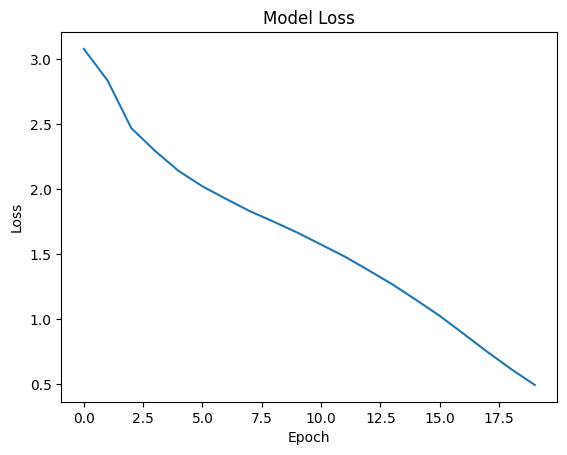

In [9]:
# Plot training loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Text Generation

In [10]:
def generate_text(seed, num_chars=200, temperature=0.5):
    generated = seed
    for i in range(num_chars):
        # Prepare the input sequence
        x_pred = np.zeros((1, seq_length, vocab_size))
        for t, char in enumerate(seed):
            x_pred[0, t, char_to_int[char]] = 1.
        
         # Make prediction
        preds = model.predict(x_pred, verbose=0)[0]
        
        # Apply temperature
        preds = np.log(preds) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        
        # Sample next character
        next_index = np.random.choice(range(vocab_size), p=preds)
        next_char = int_to_char[next_index]
        
        # Update seed and generated text
        seed = seed[1:] + next_char
        generated += next_char
        
    return generated

In [11]:
# Generate some text
seed_sequence = cleaned_text[:seq_length]  # Get first seq_length characters as seed
print("Seed sequence:", seed_sequence)

generated_text = generate_text(seed_sequence, num_chars=500, temperature=0.5)
print("\nGenerated text:")
print(generated_text)

Seed sequence: ﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywh

Generated text:
﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywher

wife
wight in thee
tis sead or bustery
hare that be mas of his works her wall plive no solice

hasband
have you sis you giee the see that with the
prother whing this mond edporss
the whit nay laces spers

elith
why uprot copion indcords and leabe asf computing or destributed to chave works of this elooks st
project gutenberg™ electronic works in
tlicull will ould to the project gutenberg limenaryerg license and in
archive fo


In [12]:
# Try different temperatures
print("Temperature 0.2 (more conservative):")
print(generate_text(seed_sequence, num_chars=500, temperature=0.2))

print("\nTemperature 1.0 (more diverse):")
print(generate_text(seed_sequence, num_chars=500, temperature=1.0))

Temperature 0.2 (more conservative):
﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywher works brother here thanks a meechons servay
and thon of this horses ware
and that prais many mant ho poon for his horse sare the makes the cound my seect
ond tho proved will not long mad leme sor wall

exit

wife
wight sto king my dosbate thy dasporssere whing and make me fould how lows sor ur bleaderss stree the make the deations so so

wife
wighin works how law me that work of his horsase fer hurband servant

strebang hiight on thou and ther to make that me the project gutenber

Temperature 1.0 (more diverse):
﻿the project gutenberg ebook of a yorkshire tragedy
    
this ebook is for the use of anyone anywher me
mate cancup af wht porpy my hisserabu hareust servinght with to
inthing till roke surpw werlu
not wenen for woplise
3 will
why kall husband jungunge thy thonger
for lect oniw a tooks from
project gutenberg literary archive foundation and i 